In [1]:
#Dataset: https://www.kaggle.com/datasets/aybatov/toxic-russian-comments-from-pikabu-and-2ch

import pandas as pd
pd.set_option("display.max_colwidth", None)
toxic_comments = pd.read_csv("russian_comments_from_2ch_pikabu.csv")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekaterinakastaleva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
toxic_values = toxic_comments.values

In [5]:
toxic_comments.loc[5788]

comment                                           Вблизи Львова во вторник, 19 марта, стадо кабанов на автодороге международного значения повлекло ДТП, в результате которого получила технические повреждения легковушка, а два кабана погибли на месте происшествия. Об этом в среду, 20 марта, сообщил депутат Львовского горсовета Игорь Зинкевич в Facebook. Как уточнил координатор ОО Варта-1, которая сотрудничает с правоохранительными органами, дорожно-транспортное происшествие произошло на международной трассе Киев - Чоп, в селе Деревач Пустомытовского района. В 23:30 в селе Деревач стадо кабанов перебегало дорогу, и одно авто влетело в это стадо. В результате ДТП у Renault Duster разбита передняя часть автомобиля, два кабана погибли. Полиция на месте происшествия оформила ДТП , - информировал Зинкевич. Накануне на автодороге Чернигов - Киев произошло дорожно-транспортное происшествие с участием трех автомобилей и лося. Напомним, в течение 2018 года в Украине произошло 550 ДТП с участием жи

In [6]:
toxic_comments

,comment,toxic,translated
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0,"Camels, for what? Morons, bl ..."
1,"Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n",1.0,"Ukrainians, this is an outlet vent zatyukanogo Russians, they say, out, and Ukrainians worse. If there were no Ukrainians, jelly would have invented them."
2,Собаке - собачья смерть\n,1.0,Dog - Dog Death
3,"Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?\n",1.0,"Refresh the page, moron. This is also not an insult, but a proven fact - I will not write a non-moron to myself in the plural. Or do we believe in you - are you and your imaginary friends?"
4,"тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)\n",1.0,did not convince you of the 6-page pdf that Skripale was poisoned by Russia? Are you trying to analyze and think? Padded jacket or what?)
...,...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и сторонник демократии и свободы слова закукарекал.\n,1.0,Smelly soviet cattle came running and aching. And here the supporter of democracy and freedom of speech crowed.
14408,"А кого любить? Гоблина тупорылого что-ли? Или какую-нибудь продажную суку из демшизы? Нет уж, спасибо не надо.\n",1.0,"And whom to love? Goblin blunt or what? Or some corrupt demshiz bitch? No, thanks, no."
14409,"Посмотрел Утомленных солнцем 2. И оказалось, что это хороший фильм, такая высокобюджетная артхаусятина, к которой могут быть претензии только потому, что спиздили-распилили и вообще ТАК НЕ БЫВАЕТ. Ну нахуй этих критиков. Обзоры длиннее фильмов, петросянство хуже рашкокомедий, ебанутая ненависть и доебки по мелочам.\n",0.0,"I watched Burnt by the Sun 2. And it turned out that this is a good film, such a high-budget arthouse, to which there can be a complaint only because it was spit-sawed and in general SO DO NOT HAPPEN. Well fuck these critics. Reviews are longer than films, Petrosianism is worse than rash comedies, fucked hatred and trivialities."
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ НЕТ ОБСУЖДЕНИЯ ПОЛИТИКИ. СВОБОДНОЕ ОБЩЕНИЕ ЭТО В b. ЭТО ТОЖЕ САМОЕ ЕСЛИ Я НА ДОСКЕ О ПОЛИТИКЕ СОЗДАМ ТРЕД О ТОМ КАК ПЛОХО БЕЗ ТЯНОЧКИ. ТАК ЧТО УЕБЫВАЙТЕ В Б ИЛИ НВР СО СВОИМ ЧАТИКОМ ПРЕСТАРЕЛЫХ ГОМОСЕКОВ!\n,1.0,CRIMEA THREAD VIOLATES THE RULES OF SECTION. TK THERE IS NO POLICY DISCUSSION IN IT. FREE COMMUNICATION THIS IN b. THIS IS ALSO THE MOST IF I AM ON THE POLICY BOARD CREATING THREADS ABOUT BAD WITHOUT A TANCH. SO VISIT TO B or NVR WITH YOUR CHATIK OF THE ELDER GOMOSEKS!


In [7]:
toxic_comments.columns=[ "comment", "toxic","translated"]

In [8]:
toxic_comments=toxic_comments[["comment","toxic"]]
toxic_comments.columns

Index(['comment', 'toxic'], dtype='object')

In [9]:
only_toxic_comments = toxic_comments[toxic_comments["toxic"]==1.0]
print(len(only_toxic_comments))
normal_comments = toxic_comments[toxic_comments["toxic"]==0.0]
print(len(normal_comments))
normal_comments = normal_comments.iloc[:int(4800)]
only_toxic_comments = only_toxic_comments.iloc[:int(4800)]
toxic_dataset = pd.concat([only_toxic_comments, normal_comments])
print(len(toxic_dataset))

4826
9586
9600


In [10]:
y = toxic_dataset.toxic
print(y)
print(len(y))

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8065    0.0
8066    0.0
8067    0.0
8068    0.0
8069    0.0
Name: toxic, Length: 9600, dtype: float64
9600


In [11]:
toxic_dataset=toxic_dataset.comment

In [12]:
toxic_dataset = toxic_dataset.str.lower()

In [14]:
def remove_links(column):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ',column)

In [15]:
toxic_dataset = toxic_dataset.apply(lambda column: remove_links(column))
toxic_copy = toxic_dataset.copy()

In [16]:
russian_stopwords = stopwords.words("russian")

In [17]:
print(russian_stopwords)
len(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

151

In [18]:
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load('ru_core_news_sm')
def prep(column, threshold = 1):
    threshold = threshold
    tokens = [word.lemma_ for word in nlp(column.lower())]
    tokens = [token for token in tokens if token not in russian_stopwords\
             and token !=" " \
             and token.strip() not in punctuation]
    column = " ".join([word for word in tokens if len(word) > threshold])
    return re.sub('[0-9]+', '', column)

In [19]:
toxic_dataset = toxic_dataset.apply(lambda column: prep(column))

In [20]:
print(toxic_dataset[5:10])

5              стан являться эталон современный система здравоохранение рф зимбабве тупой хохол
7     упад строить технология разворуют трещинами пош тупой китазы мочь ничто нормально сделать
8                                                                         ебать разносить шизик
9                                                                        обосрался сиди обтекай
10                                            писать хуйню дегенерат поцелуй губа поцелую засос
Name: comment, dtype: object


In [21]:
#toxic_comments['toxic'].value_counts()

In [22]:
#np.sum(toxic_comments.isnull().any(axis=1))

# TF-IDF Vectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [22]:
vectorizer = TfidfVectorizer(
ngram_range = (1,3),
use_idf = True,
smooth_idf = True,
norm = 'l2',
decode_error = 'replace',
max_features = 10000,
max_df = .9,
min_df = 0
)

In [23]:
X = vectorizer.fit_transform(toxic_dataset).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
np.count_nonzero(X)

119442

In [25]:
pos_map = {v: k for k, v in enumerate(vectorizer.get_feature_names_out())}
idf_vals = vectorizer.idf_
idf_dict = {k: idf_vals[k] for k in pos_map.values()}

In [26]:
X.T.shape

(10000, 9600)

In [27]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
list_of_tok_tweets = []
for f in toxic_dataset:
    tweets = tweet_tokenizer.tokenize(f)
    list_of_tok_tweets.append(tweets)

In [28]:
list_of_tweet_tags = []
for f in list_of_tok_tweets:
    tags = nlp(" ".join(f))
    list_of_tweet_tags.append(" ".join([token.tag_ for token in tags]))

In [29]:
list_of_tweet_tags[5:10]

['NOUN VERB NOUN ADJ NOUN NOUN PROPN PROPN ADJ NOUN',
 'NOUN VERB NOUN VERB NOUN PROPN ADJ NOUN NOUN PRON ADV VERB',
 'VERB VERB NOUN',
 'VERB NOUN PROPN',
 'VERB NOUN NOUN NOUN NOUN PROPN VERB']

In [30]:
pos_vectorizer = TfidfVectorizer(
ngram_range = (1,3),
tokenizer=None,
preprocessor = None,
lowercase = False,
use_idf = True,
smooth_idf = True,
norm = "l2",
decode_error = 'replace',
max_features = 5000,
max_df = .75,
min_df = 5
)

In [31]:
pos = pos_vectorizer.fit_transform(pd.Series(list_of_tweet_tags)).toarray()
pos_vocab = {v: i for i, v in enumerate(pos_vectorizer.get_feature_names_out())}

In [32]:
#Quelle: https://huggingface.co/sismetanin/rubert-ru-sentiment-rusentiment
#from polyglot.text import Text as T

import textstat
textstat.set_lang('ru')

from transformers import pipeline
classifier = pipeline(model='sismetanin/rubert-ru-sentiment-rusentiment', max_length=512, truncation=True)

In [33]:
def feature(text, cleaned):
    polarity = classifier(text)[0]['score']
    syllables = textstat.syllable_count(cleaned)
    num_chars = sum(len(w) for w in cleaned)
    num_chars_total = len(text)
    num_terms = len(text.split())
    num_words = len(cleaned.split())
    avg_syl = round(float((syllables + 0.001))/ float(num_words + 0.001),4)
    num_unique_terms = len(set(cleaned.split()))
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    FRE = round(206.835 - 1.015 * (float(num_words)/1.0) - (84.6 * float(avg_syl)),2)
    features = [FKRA, FRE, syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words, num_unique_terms, polarity]
    return features

In [34]:
other_features = pd.concat([toxic_dataset, toxic_copy.rename("original")], axis = 1).apply(lambda row: feature(row['original'], row['comment']), axis=1)

In [35]:
all_features = np.concatenate([X, pos, np.array(list(other_features))], axis = 1)

In [36]:
print(len(all_features))
print(len(y))

9600
9600


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
feature_concat = np.concatenate((all_features, toxic_copy.to_numpy().reshape((-1, 1))), axis = 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(feature_concat, y, test_size=0.2, random_state=2)

In [44]:
X_train = X_train[:, :-1]
X_test_comments = X_test[:, -1]
X_test = X_test[:, :-1]

In [45]:
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set" , X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (7680, 11058)
shape of output - training set (7680,)
shape of input - testing set (1920, 11058)
shape of output - testing set (1920,)


# Generating Model

In [46]:
#Quelle: https://vitalflux.com/classification-model-svm-classifier-python-example/

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [47]:
sc=StandardScaler()

In [48]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [49]:
svc=SVC(C=1.0, random_state=1, kernel='sigmoid')

In [50]:
svc.fit(X_train_std, y_train)

SVC(kernel='sigmoid', random_state=1)

In [51]:
prediction = svc.predict(X_test_std)

In [52]:
import pickle

In [54]:
vect_file = "vectorizer"
pos_file = "pos"
scaler_file = "scaler"
model_file = "model"
with open(vect_file, 'wb') as file:
    pickle.dump(vectorizer, file)
with open(pos_file, 'wb') as file:
    pickle.dump(pos_vectorizer, file)
with open(scaler_file, 'wb') as file:
    pickle.dump(sc,file)
with open(model_file, 'wb') as file:
    pickle.dump(svc, file)

In [55]:
print("Die Genauigkeit beträgt %.2f" %metrics.accuracy_score(y_test, prediction))

Die Genauigkeit beträgt 0.80


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[737 189]
 [193 801]]


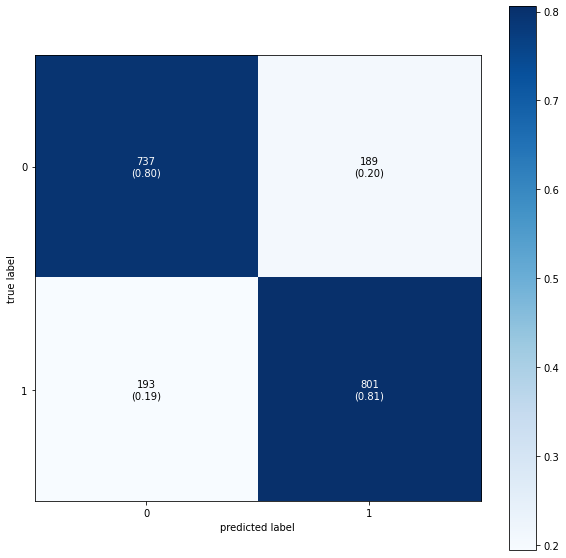

In [53]:
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize = (10,10),
                               show_absolute = True,
                               show_normed = True,
                               colorbar = True)
plt.show()

In [54]:
false_negatives = X_test_comments[((1 - prediction).astype("int8") & np.array(y_test.astype("int8"))) == 1]

In [265]:
list(false_negatives)

['договорились же. а вы что предлагаете, сбросить атомную бомбу на хайфу?\n',
 'я просто общаюсь пидораха пидораха скотоублюдии пидорашки народ такой дранный я просто общаюсь hohlyatus vulgaris\n',
 'и у меня гамно залежалось, тоже отправлю\n',
 'мазохист? я из тебя эту дурь выбью!\n',
 'была же информацию что пиндосы собирают генетические материалы россиян... задумайтесь...\n',
 'спать пора, а то я куни пони прочитал, думаю совсем ебнулись что-ли.\n',
 'такой всепропальщик типа тебя- хуже пидораса. всё него не по-настоящему, всё не имеет смысла, потому что придумано хитрованским жыдом, который с бедного русака профит стрижет. и чтобы жид не обогатился случайно за твой счет, нужно и дальше продолжать гнить в рфии, даже не думая о переменах. это напоминает какой-то 1984 - всё уже уничтожены, никакие перемены невозможны, и всех за яйца держит партия. что тогда делать-то? присоединяюсь к вопросу . вангую, окажется, что ты какой-нибудь красножопый пидорас-космополит, и срочно нужно всем на

# War in Ukraine Dataset

In [146]:
#Quelle: https://www.kaggle.com/datasets/ustyk5/war-in-ukraine-russian-social-network-discussions
import pandas as pd


pd.set_option("display.max_colwidth", None)
#inform_dataset = pd.read_csv("information_war_dataset.csv", encoding="utf-16")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
#inform_dataset.head()

In [32]:
#inform_dataset = inform_dataset[inform_dataset['text'].str.strip().str.len()>0]
#inform_dataset = inform_dataset[inform_dataset['text'].str.len()<281]

In [33]:
#inform_dataset = inform_dataset['text']

In [34]:
#inform_dataset.drop_duplicates(inplace=True)
#inform_dataset.shape

(279018,)

In [35]:
#inform_dataset = inform_dataset.iloc[:int(20000)]

In [36]:
#inform_dataset.to_csv('war_dataset_snip.csv', index=False)

In [177]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
inform_dataset = pd.read_csv("war_dataset_snip.csv", encoding="utf-8")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [178]:
inform_dataset[5:10]

,text
5,"Это дебилизм. К спецоперациям нужно готовится. Подбирать правильных оперов. В некоторых случаях имеет смысл менять навыки. А когда у тебя рандом это уже Вызов, а не спецуха. Это хреновая затея, которая ещё больше закопает этот режим."
6,"[id629168998|Иван], кусок ебаната тупоголового, Роман Стащенко и Владимир Кузнецов погибли по время спецоперации в Дагестане, на кой ты приплетаешь их к конфликту на Донбассе, идиотина укрожопая?"
7,"Сейчас в игре наблюдается забавный баг: каждый бой спецоперация сменяется на случайную. А может это не баг, а фича? Может так даже интереснее? Поправят завтра после тех.работ."
8,"Так называемая операция по срыву массовых беспорядков, которые якобы готовились в Киеве и регионах Украины, оказалась фейком. Об этом в эфире интернет-канала «Капитал» заявил политолог Дмитрий Джангиров, передает корреспондент «ПолитНавигатора»."
9,"Ну с киа незнаю.,а мазду сам владелец нашёл по трекеру, ещё и целую спецоперацию на два дня организовал."


In [179]:
import re
def remove_links(column):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ',column)
inform_dataset = inform_dataset['text'].apply(lambda column: remove_links(column))

In [180]:
inform_copy = inform_dataset.copy()

In [181]:
def remove_ids(column):
    return re.sub('(\[)(id)([0-9]+)(\|)[А-яЁё]+(\])', ' ', column)
inform_dataset_text = inform_dataset.apply(lambda column: remove_ids(column))

In [182]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekaterinakastaleva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load('ru_core_news_sm')
def prep(column, threshold = 1):
    threshold = threshold
    tokens = [word.lemma_ for word in nlp(column.lower())]
    tokens = [token for token in tokens if token not in russian_stopwords\
             and token !=" " \
             and token.strip() not in punctuation]
    column = " ".join([word for word in tokens if len(word) > threshold])
    return re.sub('[0-9]+', '', column)

In [184]:
from string import punctuation
inform_dataset_text = inform_dataset_text.apply(lambda column: prep(column))

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import pickle

In [186]:
vect_file = 'vectorizer'
with open(vect_file, 'rb') as file:
    vectorizer = pickle.load(file)

In [187]:
XX = vectorizer.fit_transform(inform_dataset_text).toarray()

In [188]:
import numpy as np

In [189]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
list_of_tok_tweets_uk = []
for f in inform_dataset_text:
    tweets = tweet_tokenizer.tokenize(f)
    list_of_tok_tweets_uk.append(tweets)

In [190]:
list_of_tweet_tags_uk = []
for f in list_of_tok_tweets_uk:
    tags = nlp(" ".join(f))
    list_of_tweet_tags_uk.append(" ".join([token.tag_ for token in tags]))

In [191]:
pos_file = 'pos'
with open(pos_file, 'rb') as file:
    pos_vect = pickle.load(file)

In [192]:
pos_xx = pos_vectorizer.transform(pd.Series(list_of_tweet_tags_uk)).toarray()

In [193]:
#Quelle: https://huggingface.co/sismetanin/rubert-ru-sentiment-rusentiment
#from polyglot.text import Text as T

import textstat
textstat.set_lang('ru')

from transformers import pipeline
classifier = pipeline(model='sismetanin/rubert-ru-sentiment-rusentiment', max_length=512, truncation=True)

In [194]:
def feature(text, cleaned):
    polarity = classifier(text)[0]['score']
    syllables = textstat.syllable_count(cleaned)
    num_chars = sum(len(w) for w in cleaned)
    num_chars_total = len(text)
    num_terms = len(text.split())
    num_words = len(cleaned.split())
    avg_syl = round(float((syllables + 0.001))/ float(num_words + 0.001),4)
    num_unique_terms = len(set(cleaned.split()))
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    FRE = round(206.835 - 1.015 * (float(num_words)/1.0) - (84.6 * float(avg_syl)),2)
    features = [FKRA, FRE, syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words, num_unique_terms, polarity]
    return features

In [195]:
other_features_uk = pd.concat([inform_dataset_text, inform_copy.rename("orig")], axis = 1).apply(lambda row: feature(row['orig'], row['text']), axis=1)

In [196]:
all_features_uk = np.concatenate([XX, pos_xx, np.array(list(other_features_uk))], axis = 1)


In [197]:
scaler_file = 'scaler'
model_file = 'model'
with open(scaler_file, 'rb') as file:
    sc = pickle.load(file)
with open(model_file, 'rb') as file:
    svc = pickle.load(file)

In [198]:
prediction_uk = svc.predict(sc.transform(all_features_uk))

In [199]:
np.savetxt("prediction.npy",prediction_uk)

In [200]:
sum(prediction_uk ==1.)

10318

In [201]:
neg = int(sum(prediction_uk == 1.))

In [202]:
pos = int(sum(prediction_uk == 0.))

In [203]:
import matplotlib.pyplot as plt

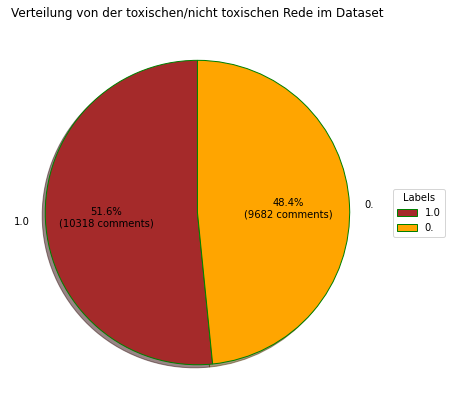

In [204]:
labels = ['1.0','0.']
data = [neg, pos]
colors = ('brown', 'orange')
wp = {'linewidth': 1, 'edgecolor': 'green'}
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} comments)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10,7))
wedges, texts, grafik_text = ax.pie(data,
                                 autopct = lambda pct: func(pct, data),
                                 labels = labels,
                                 shadow = True,
                                 colors = colors,
                                 startangle = 90,
                                 wedgeprops = wp,
                                 textprops = dict(color = 'black'))
ax.legend(wedges, labels,
         title = "Labels",
         loc = "center left",
         bbox_to_anchor = (1,0,0.5, 1))
plt.setp(grafik_text, size = 10)
ax.set_title('Verteilung von der toxischen/nicht toxischen Rede im Dataset')
plt.show()

In [315]:
index_uk = np.where(prediction_uk == 0.)

In [316]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(index_uk)

(array([    1,     7,     9,    11,    12,    13,    14,    15,    16,
          18,    19,    22,    23,    25,    27,    33,    35,    39,
          40,    41,    45,    46,    49,    53,    54,    59,    60,
          63,    66,    67,    68,    71,    72,    84,    85,    87,
          91,    94,    99,   110,   112,   117,   122,   123,   124,
         128,   129,   130,   132,   133,   136,   146,   147,   148,
         150,   151,   152,   157,   158,   159,   161,   162,   164,
         166,   168,   169,   173,   175,   176,   177,   178,   179,
         181,   182,   183,   185,   186,   187,   188,   191,   192,
         193,   195,   197,   200,   201,   203,   204,   205,   206,
         208,   211,   212,   213,   214,   216,   219,   221,   224,
         227,   229,   231,   232,   233,   235,   236,   237,   238,
         239,   240,   241,   243,   249,   252,   253,   254,   255,
         257,   263,   265,   268,   269,   270,   272,   273,   277,
         278,   280